# Assignment 2

This is due in on Friday **December 11th before 2pm**. Mark weighting is in brackets. Do add comments to your code, you'll lose points if your code is hard to understand. Graphs without labels (or units when appropriate) are not worth any point.

1. Save your work to GitHub **after** having run all cells with `Runtime`->`Restart and run all`.
2. Do not change the `assignment_2.ipynb` filename.
3. Do add comments to your code, you'll lose points (up to 50%) if your code is hard to understand. 
4. Graphs without labels (or units when appropriate) are not worth any point.

## Exercise 1 

A flat metal sheet has the shape of an equilateral triangle of side length 3 metre. The area density of the sheet increases with the distance $r$ from the centre of the triangle according to the formula $\rho = 1.34\,\left|\, \sin({7.4\,r})\,\right|\,kg\,m^{−2}$ (`rho=1.34*|sin(7.4r)|`).
**Use the Monte Carlo (MC) method** to evaluate:

 1. [4] the area of the triangle
 
 2. [6] the mass of the triangle.

In doing so, plot an illustrative figure to show the triangle and how points are selected in the MC method (similar to the figure you made for question 2 of week 6). You will need to decide on a suitable number of points for the illustration, and for the calculation of the integral.
**Hints**: re-read the worksheet for week 6 "Monte Carlo 1" carefully. Avoid loops wherever possible - it is much faster to operate with arrays of data in Python. You can solve this analytically to check your answer if you want to, but the question asks for a Monte-Carlo solution.

area of the triangle is 3.9546 m^2


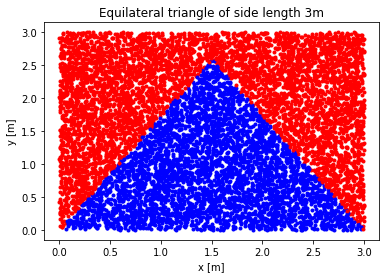

In [1]:
#finding area of triangle
import numpy as np
from numpy.random import random, normal, seed 
import matplotlib.pyplot as plt

N = int(10000) #creates 10000 random points

def triangle(x,y): #creating triamgle function
  if np.sqrt(3)*x >= y and -np.sqrt(3)*x+(3*np.sqrt(3)) >= y: #Testing to see if the points fall into the triangle
    return 1 #if the point is inside the triangle
  else:
    return 0 #if the point falls outside the triangel

n = 0 
for i in range(N):
  x = 3*np.random.rand() #picks a point randomly from 0 to 3 for x
  y = 3*np.random.rand() #picks a point randomly from 0 to 3 for y

  if triangle(x,y)==1:
    n +=1
    #plotting points within the triangle 
    if i % N//10000 == 0: 
      plt.plot(x, y,'b.')
      #plotting points outside the triangle
  else:
    if i % N//10000 == 0:
      plt.plot(x, y,'r.')


plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('Equilateral triangle of side length 3m')

area = 9*n/N #finds the area

print('area of the triangle is' ,area, 'm^2')




In [2]:
#finding the mass
p = 0
for i in range(N):
  x = 3*np.random.random() #picks a point randomly from 0 to 3 for x
  y = 3*np.random.random()#picks a point randomly from 0 to 3 for y

#for any point on the triangle we can find the mass density p at that point and add it as we run through all the points
  if triangle(x,y)==1:
    r = np.sqrt((x-1)**2+(y-np.sqrt(3)/3)**2) #distance from the centre of the triangle
    p += 1.34*np.abs(np.sin(7.4*r)) #equation for p given in the question
    

mass = p*9/N #finding the mass
print('The mass of the triangle is', mass, 'kg')

The mass of the triangle is 3.3219913009118778 kg


## Exercise 2

 1. [6] Using the 1-D `walk()` function from week 7 "Monte Carlo 2" as guidance, write code to plot out a 2-D random walk (i.e. step in one of four possible directions each time step) to the screen. Use the up-down and left-right directions, not in diagonal.

 2. [4] Plot a graph to show the mean squared position as a function of step number for multiple walks as you did for the 1-D case.


Text(0.5, 1.0, 'walk')

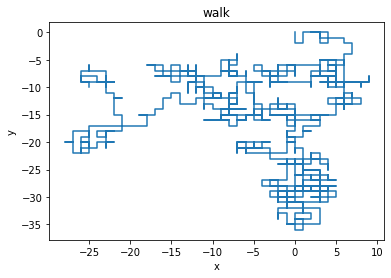

In [3]:
#question 1
def walk(steps):
    N=1000 #number of steps
    x = np.zeros(N, int) # x and y are arrays which store the coordinates of the position
    y= np.zeros(N, int)
    x[0] = 0 # starting position for x and y
    y[0] = 0

    for i in range(1, N):   

      step = np.random.choice(["Up","Down","Right","Left"])  #selects the random movement out of the 4 directions of movement
      if step == "Right":
            x[i] = x[i-1] + 1  
            y[i] = y[i-1]
      elif step == "Left":
            x[i] = x[i-1] - 1 
            y[i] = y[i-1]
      elif step == "Up" :
            x[i] = x[i-1]
            y[i] = y[i-1] + 1
      else: #down
            x[i] = x[i-1]
            y[i] = y[i-1] - 1

    return x, y

steps = 1000
x,y = walk(steps)

plt.plot(x,y) #plotting the walk
plt.ylabel('y')
plt.xlabel('x')
plt.title('walk')